In [1]:
from src import espresso_machine as esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="TiSe2") #Define project
model.set_cores(8) #Define number of prcessing cores
model.get_structure(format='poscar',path='./Research',name='/TiSe2/TiSe2.poscar') #Load structure
model.set_pseudo(path='./Research/TiSe2')
model.ecutwfc(10) #Set wavefunction cutoff
model.ecutrho(80) #Set wavefunction cutoff
model.k_points(1) #Set number of k points
model.degauss(0.1) #Set degauss value
model.conv_thr(1e-4) #Set convergence threshold
model.smearing('fd')
model.shift_atoms([0,0,0.5]) #Shift Te atom to the middle
model.config['pw']['control']['etot_conv_thr'] = 10**-2
model.config['pw']['control']['forc_conv_thr'] = 10**-1
model.config['pw']['cell']['press_conv_thr'] = 10


In [3]:
#Step 2 - Crystal optimization
model.calculate('vc-relax')

vc-relax is finished


In [4]:
#Step 3 - Atomic optimization
model.get_structure('vc-relax') #Get vc-relaxed strucutre
model.add_vacuum('z',[0,0,5]) #Add vacuum on z direction
model.k_points([8,8,1])
model.calculate('relax')

relax is finished


In [5]:
#Step 4 - Scf calculation
model.get_structure('relax') #Get relaxed strucutre
model.calculate('scf')

scf is finished


In [6]:
# Step 5 - Run ph.x
model.set_q(nq1=6,nq2=6,nq3=1) #Set parameters
model.calculate('ph')

ph is finished


In [7]:
#Step- 2 - Run q2r.x
model.calculate('q2r') #Run calculation

q2r is finished


In [8]:
#Step 5 - Bands calculation
path = ['GAMMA','M',"K","GAMMA"] #define corners
model.band_points(path,number=50) #define path
model.calculate('bands')

bands is finished
bands-pp is finished


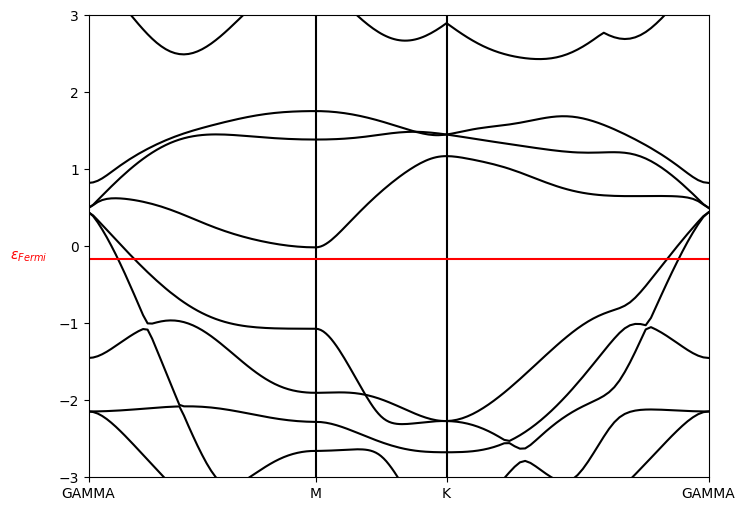

In [9]:
#Step 6 - Plotting
model.plot('electron',ylim=[-3,3],save=True) #plot electron bands

In [10]:
#Step 3 - Run matdyn.x
num_points = 200 # Number of q points
model.calculate("matdyn") #Run calculation

matdyn is finished


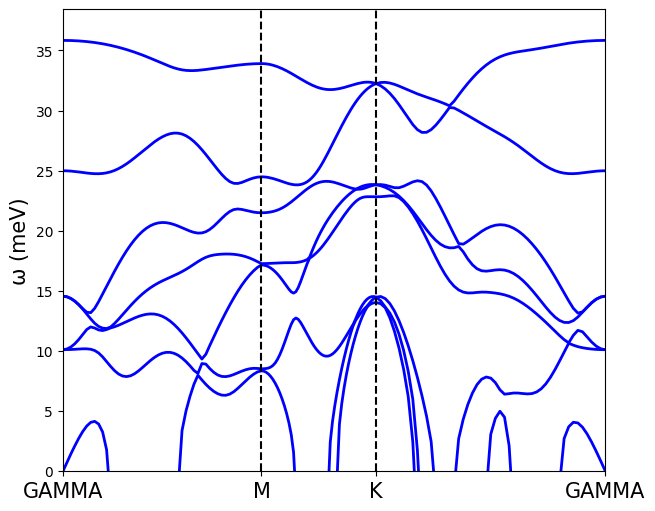

In [11]:
#Step 4 - Plotting
model.plot('phonon',save=True) # Plot phonon band